Nama : Ibnu Riski <br>
Email : ibnuriski28@gmail.com <br>
Posisi : Data Analyst (Technology)

# Question 1

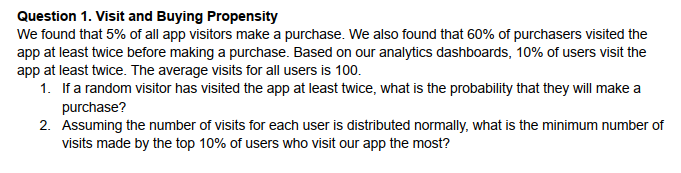

## Answer Question 1

**No. 1**
Untuk mengerjakan soal tersebut kita bisa menggunakan **Teorema Bayes**. Dimana **Teorema Bayes** ini digunakan untuk menghitung probabilitas bersyarat, dengan persamaan sebagai berikut.

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

#### Keterangan:
- **\( P(A|B) \)**: Probabilitas kejadian \( A \) terjadi jika \( B \) telah terjadi.
- **\( P(B|A) \)**: Probabilitas kejadian \( B \) terjadi jika \( A \) telah terjadi.
- **\( P(A) \)**: Probabilitas awal terjadinya kejadian \( A \) (probabilitas prior).
- **\( P(B) \)**: Probabilitas awal terjadinya kejadian \( B \).

In [5]:
# Berdasarkan soal di atas kita dapatkan informasi berikut:
# - P(P) = 0.05 (Probabilitas membeli)
# - P(V) = 0.10 (Probabilitas mengunjungi minimal dua kali)
# - P(V|P) = 0.60 (Probabilitas mengunjungi minimal dua kali jika membeli) 

# Probabilitas
P_P = 0.05  # Probabilitas membeli
P_V = 0.10  # Probabilitas mengunjungi minimal dua kali
P_V_given_P = 0.60  # Probabilitas mengunjungi minimal dua kali jika membeli

# Teorema Bayes
P_P_given_V = (P_V_given_P * P_P) / P_V
print(f"Probabilitas pembelian jika pengguna mengunjungi minimal dua kali: {P_P_given_V:.2%}")

Probabilitas pembelian jika pengguna mengunjungi minimal dua kali: 30.00%


### No 2

**No.2**<br>**Batas Minimum Kunjungan untuk 10% Pengguna Teratas**

Diketahui jumlah kunjungan rata-rata = 100, dan kita anggap distribusi normal.
Gunakan nilai z-score untuk persentil 90%:

- Z-score untuk persentil 90% dari distribusi normal = 1.28
- Menggunakan rumus distribusi normal $$[X = \mu + (z \times \sigma)]$$

Dengan asumsi kita tidak memiliki standar deviasi $\sigma$, kita misalkan $\sigma$ = 20.

In [7]:
import scipy.stats as stats

# Data distribusi
mean_visits = 100  # Rata-rata kunjungan
std_dev = 20  # Standar deviasi asumsi
z_score = 1.28  # Z-score untuk top 10%

# Hitung batas minimum
min_visits_top_10 = mean_visits + (z_score * std_dev)
print(f"Batas minimum kunjungan untuk 10% pengguna teratas: {min_visits_top_10:.2f}")

Batas minimum kunjungan untuk 10% pengguna teratas: 125.60


> Dengan demikian maka <br> 1. Probabilitas pembelian jika pengguna mengunjungi minimal dua kali: 30.00% <br> 2. Batas minimum kunjungan untuk 10% pengguna teratas: 125.60

# Question 2

**Best Product Last 30 Days**

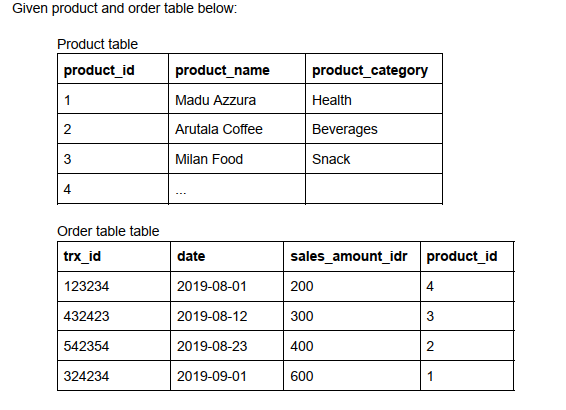

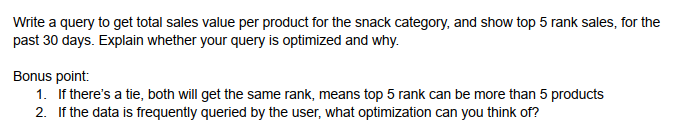

## Answer Question 2

Untuk mengerjakan soal tersebut, saya menggunakan database lokal baik dalam pembuatan database maupun menggunakan query. Disini saya menggunakan Navicat sebagai aplikasi utamanya. Berikut rinciannya.

1. Membuat Databasenya terlebih dahulu dengan menggunakan query (di localhost)

```sql
CREATE DATABASE SalesAnalyticsDB;
```

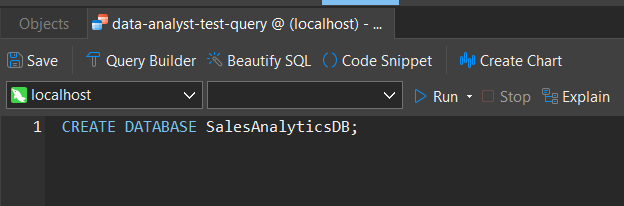

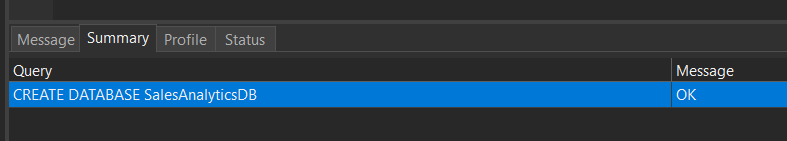

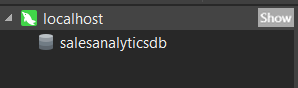

2. Berikutnya membuat tabel berdasarkan database yang sudah dibuat tadi dengan nama **salesanalyticsdb**

-- product

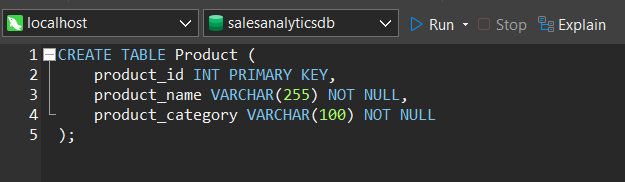

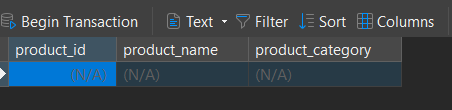

3. Kemudian setelah itu insert data ke tabel menggunakan query INSERT

```sql
INSERT INTO product (product_id, product_name, product_category) VALUES 
(1, 'Madu Azzura', 'Health'),
(2, 'Arutala Coffee', 'Beverages'),
(3, 'Milan Food', 'Snack'),
(4, 'Kripik Kentang Nusantara', 'Snack');

```

Sehingga menghasilkan data sebagai berikut<br>
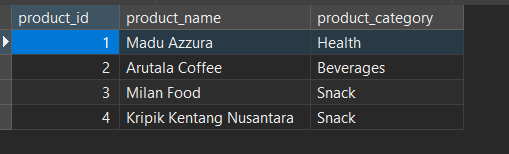

-- order_table

Berikutnya membuat tabel (order_table) dan insert data di tabel (order_table)

```sql
CREATE TABLE order_table (
    trx_id INT PRIMARY KEY,
    date DATE NOT NULL,
    sales_amount_idr DECIMAL(15,2) NOT NULL,
    product_id INT,
    FOREIGN KEY (product_id) REFERENCES product(product_id)
);

```

dimana pada field product_id di tabel order_table direferensikan ke product_id di tabel product

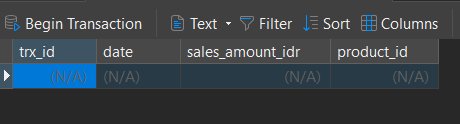

Insert data ke order_table

```sql
INSERT INTO order_table (trx_id, date, sales_amount_idr, product_id) VALUES  
(123234, STR_TO_DATE('2019-08-01', '%Y-%m-%d'), 200, 4),  
(432423, STR_TO_DATE('2019-08-12', '%Y-%m-%d'), 300, 3),  
(542354, STR_TO_DATE('2019-08-23', '%Y-%m-%d'), 400, 2);
```

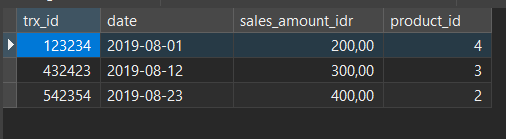

Untuk mengecek apakah Foreign Keynya bekerja atau tidak, ubah visualisasi ke dalam bentuk ERD.

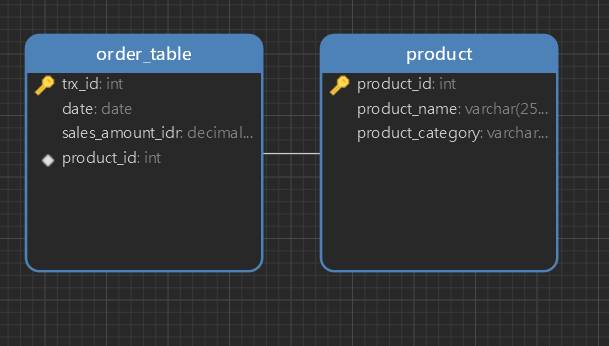

Berikut adalah query SQL untuk mendapatkan total penjualan per produk dalam kategori "Snack" dan menampilkan peringkat 5 teratas berdasarkan penjualan dalam 30 hari terakhir:

```sql
SELECT
	ROW_NUMBER() OVER (ORDER BY SUM(ot.sales_amount_idr) DESC) as 'no',
	p.product_id,
	p.product_name,
	SUM(ot.sales_amount_idr) as total_sales_value
FROM
	order_table ot
	JOIN product p ON ot.product_id = p.product_id
-- filter untuk mendapatkan hanya product untuk kategori snack dan rentang data 30 hari terakhir ( 1 agustus - 31 agustus)
WHERE p.product_category = 'Snack' AND ot.date BETWEEN '2019-08-01' AND '2019-08-31'
GROUP BY p.product_name
ORDER BY total_sales_value DESC LIMIT 5
```

Berikut untuk tampilannya

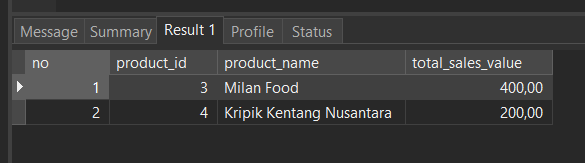

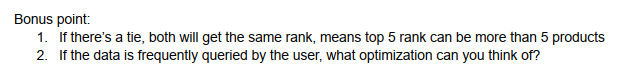

Untuk mengatasi problem pada tie ranking, kita dapat memodifikasi query tersebut dengan menggunakan DENSE_RANK() sehingga query yang dapat ditulis menjadi

```sql
SELECT 
    DENSE_RANK() OVER (ORDER BY SUM(ot.sales_amount_idr) DESC) AS no,
    p.product_id,
    p.product_name,
    SUM(ot.sales_amount_idr) AS total_sales_value
FROM 
    order_table ot
JOIN 
    product p ON ot.product_id = p.product_id
WHERE 
    p.product_category = 'Snack'
    AND ot.date BETWEEN '2019-08-01' AND '2019-08-31'
GROUP BY 
    p.product_id, p.product_name
ORDER BY 
    total_sales_value DESC;
```

Berikutnya query tersebut juga dapat dilakukan optimasi agar performanya lebih cepat ketika sering diakses oleh user dengan menggunakan index berikut

```sql
CREATE INDEX idx_order_date ON order_table(date);
CREATE INDEX idx_product_category ON product(product_category);
```

Berikut Merupakan hasil dari data query sebelum dan setelah dilakukan proses DENSE_RANK()

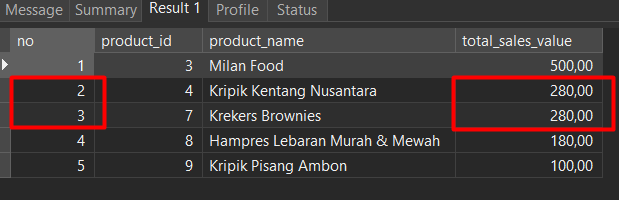

> pada data tersebut terlihat, untuk total_sales_value pada Kripik Kentang Nusantara dan Krekers Brownies nilainya sama, akan tetapi memiliki peringkat yang berbeda.

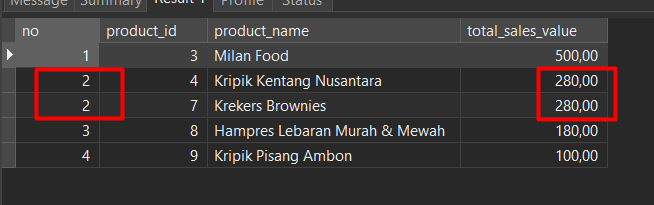

> Sementara itu, ketika sudah dilakukan DENSE_RANK(), peringkatnya menjadi sama.

# Question 3